In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train.head()
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train.shape

(1460, 81)

In [ ]:
#understand the data
train.info()
train.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
pd.options.display.float_format = '{:.0f}'.format
summary=train.describe()
summary.to_csv('summary.csv',sep=',')
print(summary)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
count 1460        1460         1201     1460         1460         1460   
mean   730          57           70    10517            6            6   
std    422          42           24     9981            1            1   
min      1          20           21     1300            1            1   
25%    366          20           59     7554            5            5   
50%    730          50           69     9478            6            5   
75%   1095          70           80    11602            7            6   
max   1460         190          313   215245           10            9   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
count       1460          1460        1452        1460  ...        1460   
mean        1971          1985         104         444  ...          94   
std           30            21         181         456  ...         125   
min         1872          1950   

In [ ]:
#Missing Values
train.isnull().sum()
total_nulls = train.isnull().sum().sum()
print(total_nulls)

7829


In [ ]:
for col in train.columns:
    null_count=train[col].isnull().sum()
    print(f" {col}- null values {null_count}")

 Id- null values 0
 MSSubClass- null values 0
 MSZoning- null values 0
 LotFrontage- null values 259
 LotArea- null values 0
 Street- null values 0
 Alley- null values 1369
 LotShape- null values 0
 LandContour- null values 0
 Utilities- null values 0
 LotConfig- null values 0
 LandSlope- null values 0
 Neighborhood- null values 0
 Condition1- null values 0
 Condition2- null values 0
 BldgType- null values 0
 HouseStyle- null values 0
 OverallQual- null values 0
 OverallCond- null values 0
 YearBuilt- null values 0
 YearRemodAdd- null values 0
 RoofStyle- null values 0
 RoofMatl- null values 0
 Exterior1st- null values 0
 Exterior2nd- null values 0
 MasVnrType- null values 872
 MasVnrArea- null values 8
 ExterQual- null values 0
 ExterCond- null values 0
 Foundation- null values 0
 BsmtQual- null values 37
 BsmtCond- null values 37
 BsmtExposure- null values 38
 BsmtFinType1- null values 37
 BsmtFinSF1- null values 0
 BsmtFinType2- null values 38
 BsmtFinSF2- null values 0
 BsmtUnfSF- 

In [ ]:
for col1 in train.columns:
    null_per=train[col1].isnull().mean()*100
    print(f" {col1}- null values {null_per}")

 Id- null values 0.0
 MSSubClass- null values 0.0
 MSZoning- null values 0.0
 LotFrontage- null values 17.73972602739726
 LotArea- null values 0.0
 Street- null values 0.0
 Alley- null values 93.76712328767123
 LotShape- null values 0.0
 LandContour- null values 0.0
 Utilities- null values 0.0
 LotConfig- null values 0.0
 LandSlope- null values 0.0
 Neighborhood- null values 0.0
 Condition1- null values 0.0
 Condition2- null values 0.0
 BldgType- null values 0.0
 HouseStyle- null values 0.0
 OverallQual- null values 0.0
 OverallCond- null values 0.0
 YearBuilt- null values 0.0
 YearRemodAdd- null values 0.0
 RoofStyle- null values 0.0
 RoofMatl- null values 0.0
 Exterior1st- null values 0.0
 Exterior2nd- null values 0.0
 MasVnrType- null values 59.726027397260275
 MasVnrArea- null values 0.547945205479452
 ExterQual- null values 0.0
 ExterCond- null values 0.0
 Foundation- null values 0.0
 BsmtQual- null values 2.5342465753424657
 BsmtCond- null values 2.5342465753424657
 BsmtExposure-

In [ ]:
train=train.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)
test=test.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [ ]:
train['LotFrontage'].unique()
train.LotFrontage.value_counts()
train.LotFrontage.value_counts()/train.shape[0]


,count
LotFrontage,
60,0
70,0
80,0
50,0
75,0
...,...
182,0
160,0
152,0


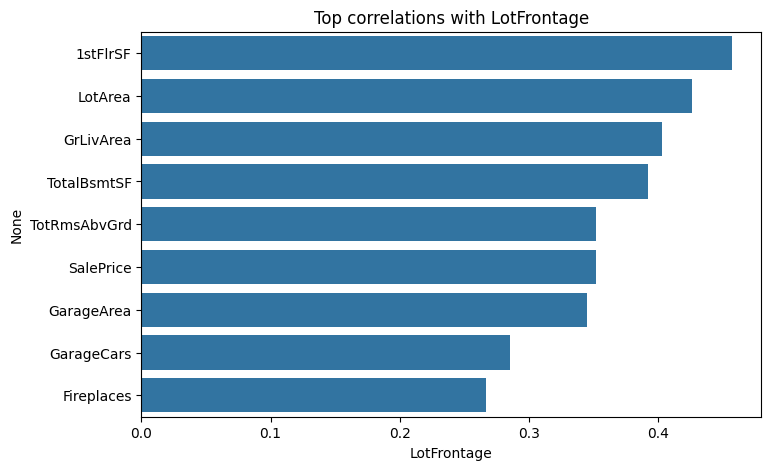

In [ ]:
#LotFrontage is Missing at Random MAR
# We can check how strongly it correlates with the target variable (SalePrice) to decide what to do for null values and to
# check its impact
# using Correlation Matrix
#Use a heatmap or correlation matrix to quickly see which numerical features are correlated with LotFrontage

import seaborn as sns
import matplotlib.pyplot as plt

# Focus on numeric columns only
num_df = train.select_dtypes(include='number')

# Compute correlation with LotFrontage
corr1= num_df.corr()['LotFrontage'].sort_values(ascending=False)

# Plot top correlated features
plt.figure(figsize=(8, 5))
sns.barplot(x=corr1[1:10], y=corr1[1:10].index)  # skip self-correlation
plt.title('Top correlations with LotFrontage')
plt.show()


In [ ]:
#Based on the correlation results, we will do missing values impuataion of LotFrontage using regression and bby making using of the strongest impact
#variables ('1stFlrSF','LotArea', 'GrlivArea', 'TotalBsmtSF')
top_features= ['1stFlrSF', 'LotArea', 'GrLivArea', 'TotalBsmtSF']
from sklearn.linear_model import LinearRegression

#Imputaion for Train_Data
#Split the data
df_train = train[train['LotFrontage'].notnull()]
df_missing = train[train['LotFrontage'].isnull()]

#Train the model
X_train = df_train[top_features]
y_train = df_train['LotFrontage']

model=LinearRegression()
model.fit(X_train, y_train)

# Step 3: Predict missing values
X_missing = df_missing[top_features]
predicted_values = model.predict(X_missing)

# Step 4: Fill in the missing values
train.loc[train['LotFrontage'].isnull(), 'LotFrontage'] = predicted_values


#Imputaion for Test_Data
####
#Split the data
df_test = test[test['LotFrontage'].notnull()]
df_missing1 = test[test['LotFrontage'].isnull()]

#Train the model
X_test = df_train[top_features]
y_test= df_train['LotFrontage']

model1=LinearRegression()
model1.fit(X_test, y_test)

# Step 3: Predict missing values
X_missing1 = df_missing1[top_features]
predicted_values1 = model.predict(X_missing1)

# Step 4: Fill in the missing values
test.loc[test['LotFrontage'].isnull(), 'LotFrontage'] = predicted_values1


# New Section

In [ ]:
print(train['LotFrontage'].isnull().sum())
print(test['LotFrontage'].isnull().sum())

0
0


In [ ]:
# Explore how MasVnrType missingness relates to MasVnrArea
train['MasVnrArea'].isnull().sum()
print(train[train['MasVnrType'].isnull()]['MasVnrArea'].value_counts())

test['MasVnrArea'].isnull().sum()
print(test[test['MasVnrType'].isnull()]['MasVnrArea'].value_counts())

MasVnrArea
0      859
1        2
288      1
344      1
312      1
Name: count, dtype: int64
MasVnrArea
0      876
285      1
1        1
198      1
Name: count, dtype: int64


 As per the table above, we can see that 99% of the missing values of MasVnrType becasue the coressponding MasVnrArea are missing and that suggests that there is no MasVnr for that house. Hence, the missing values in MasVnrType are MAR — Missing At Random.

In [ ]:
train['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

Text(0.5, 0, 'types')

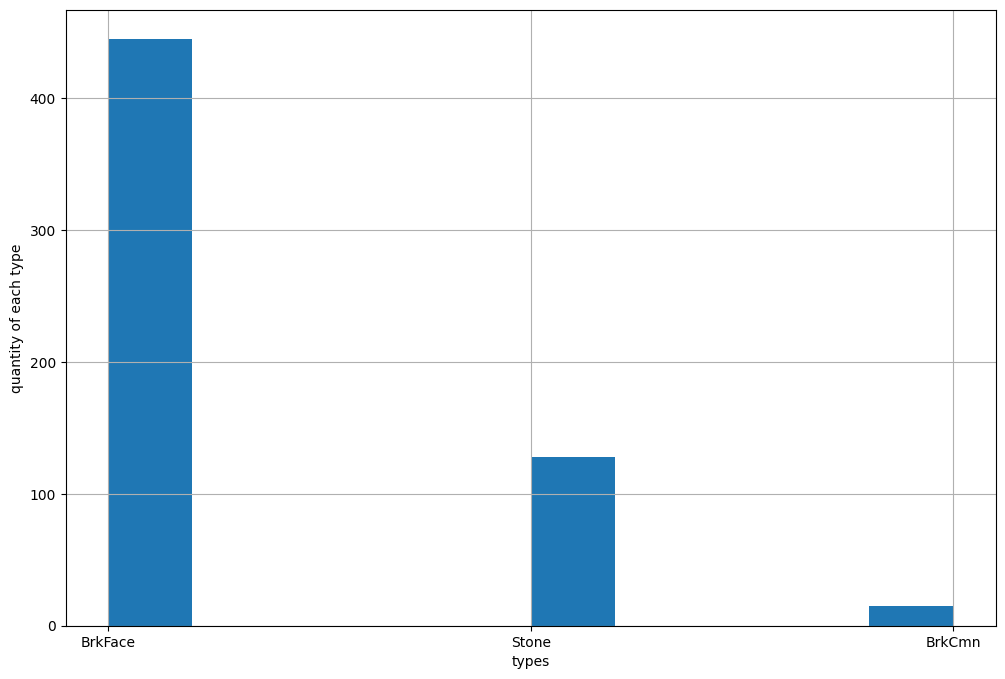

In [ ]:
plt.figure(figsize=(12,8))
fig=train.MasVnrType.hist(bins=10)
fig.set_ylabel('quantity of each type')
fig.set_xlabel('types')

In [ ]:
# Fill missing MasVnrType with 'None' if MasVnrArea is 0 (or even missing just in case)
#Trian
train.loc[
    (train['MasVnrType'].isnull()) & ((train['MasVnrArea'] == 0) | (train['MasVnrArea'].isnull())),
    'MasVnrType'
] = 'None'

#If any remaining values are still NaN, impute them using mode (just in case of data entry error)
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])


#Test:
test.loc[
    (test['MasVnrType'].isnull()) & ((test['MasVnrArea'] == 0) | (test['MasVnrArea'].isnull())),
    'MasVnrType'
] = 'None'

test['MasVnrType'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])


Missing values for Train after imputation: 0
Updated distribution:
MasVnrType
None      1
BrkFace   0
Stone     0
BrkCmn    0
Name: proportion, dtype: float64
Missing values for Test after imputation: 0
Updated distribution:
MasVnrType
None      1
BrkFace   0
Stone     0
BrkCmn    0
Name: proportion, dtype: float64


Text(0.5, 0, 'types')

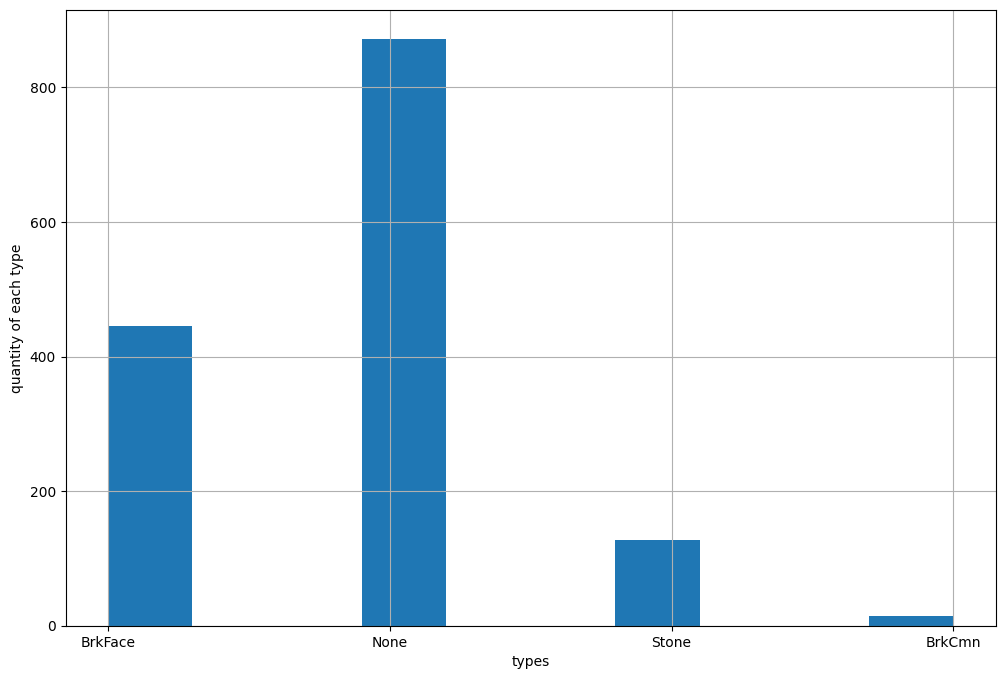

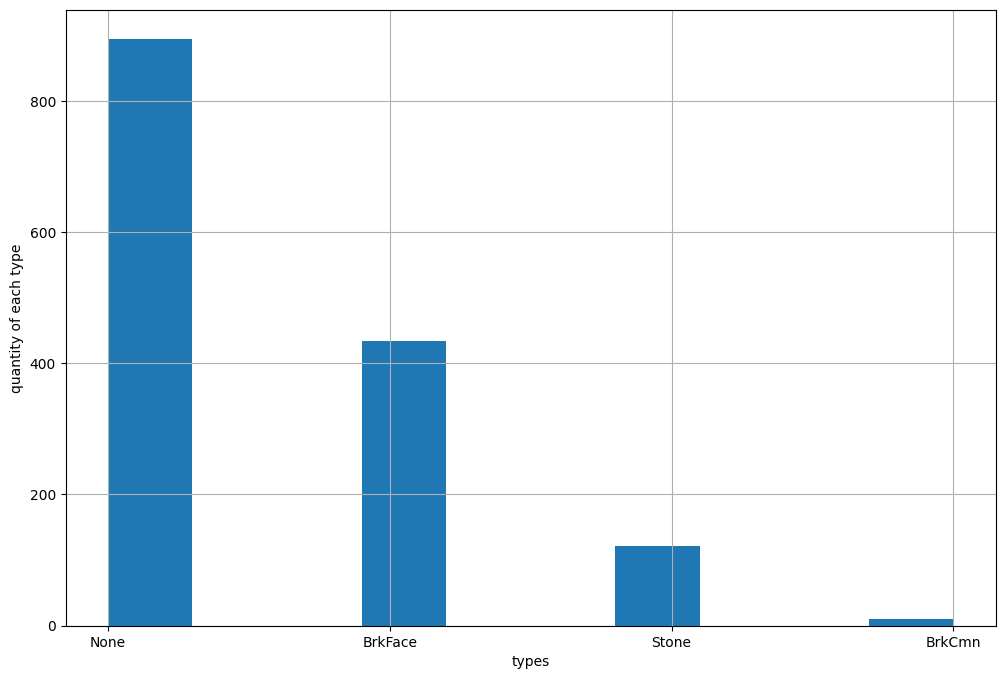

In [ ]:
print("Missing values for Train after imputation:", train['MasVnrType'].isnull().sum())
print("Updated distribution:")
print(train['MasVnrType'].value_counts(normalize=True))
plt.figure(figsize=(12,8))
fig=train.MasVnrType.hist(bins=10)
fig.set_ylabel('Train_data')
fig.set_ylabel('quantity of each type')
fig.set_xlabel('types')


print("Missing values for Test after imputation:", test['MasVnrType'].isnull().sum())
print("Updated distribution:")
print(test['MasVnrType'].value_counts(normalize=True))
plt.figure(figsize=(12,8))
fig=test.MasVnrType.hist(bins=10)
fig.set_ylabel('Test_data')
fig.set_ylabel('quantity of each type')
fig.set_xlabel('types')

Text(0.5, 0, 'types')

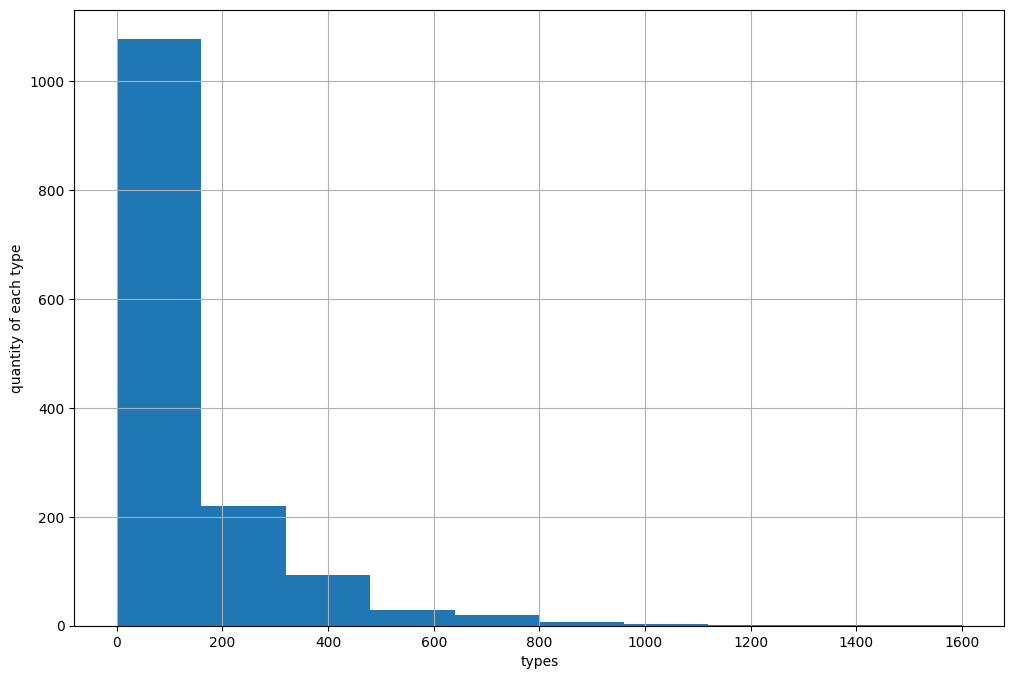

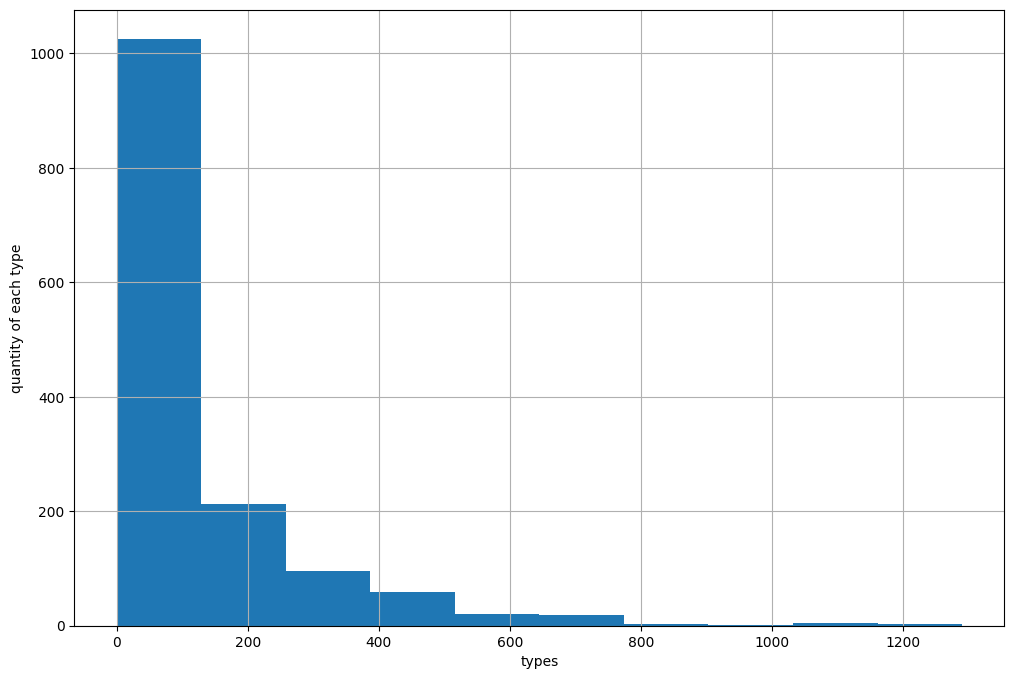

In [ ]:
plt.figure(figsize=(12,8))
fig=train.MasVnrArea.hist(bins=10)
fig.set_ylabel('quantity of each type')
fig.set_xlabel('types')
####
plt.figure(figsize=(12,8))
fig=test.MasVnrArea.hist(bins=10)
fig.set_ylabel('quantity of each type')
fig.set_xlabel('types')

Since the distribution of MasVarArea is highly Skewed, and also the percentage of missing values is really low. Therefore, missing data is imputed using Median

In [ ]:
a1=train['MasVnrArea'].median()
train['MasVnrArea'] = train['MasVnrArea'].fillna(a1)

a2=test['MasVnrArea'].median()
test['MasVnrArea'] = test['MasVnrArea'].fillna(a2)

In [ ]:
no_basement = train['TotalBsmtSF'] == 0
bsmtqual_missing = train['BsmtQual'].isnull()

# Rows where TotalBsmtSF is 0 but BsmtQual is not missing
check1 = train[no_basement & (~bsmtqual_missing)]
print(f"Rows with TotalBsmtSF = 0 but BsmtQual is NOT missing: {check1.shape[0]}")

# Rows where BsmtQual is missing but TotalBsmtSF is not 0
check2 = train[bsmtqual_missing & (train['TotalBsmtSF'] != 0)]
print(f"Rows with BsmtQual missing but TotalBsmtSF ≠ 0: {check2.shape[0]}")

if check1.shape[0] > 0:
    print("🔍 Some rows have 0 SF but non-null BsmtQual:\n")
    display(check1[['TotalBsmtSF', 'BsmtQual', 'BsmtCond']])

if check2.shape[0] > 0:
    print("Some rows have missing BsmtQual but non-zero basement area:\n")
    display(check2[['TotalBsmtSF', 'BsmtQual', 'BsmtCond']])

suspecious_bmstqual = train[(train['TotalBsmtSF'] != 0) & (train['BsmtQual'].isnull())]
suspecious_bmstcond = train[(train['TotalBsmtSF'] != 0) & (train['BsmtCond'].isnull())]
print(f"BsmtQual missing but TotalBsmtSF > 0: {suspecious_bmstqual.shape[0]} rows")
print(f"BsmtCond missing but TotalBsmtSF > 0: {suspecious_bmstcond.shape[0]} rows")

Rows with TotalBsmtSF = 0 but BsmtQual is NOT missing: 0
Rows with BsmtQual missing but TotalBsmtSF ≠ 0: 0
BsmtQual missing but TotalBsmtSF > 0: 0 rows
BsmtCond missing but TotalBsmtSF > 0: 0 rows


In [ ]:
#train['TotalBsmtSF'].unique()
no_basement=train['TotalBsmtSF']==0
train.loc[no_basement,'BsmtQual'] = 'None'
train.loc[no_basement,'BsmtCond'] = 'None'

Since TotalBsmtSF represents the total area of the basemnt; and total area=0 coresspondes to missing values on BsmtQual and BsmtCond (after checking). Hence, we will impute the missing vlaues in bsmtquad and bsmtcond using "None"

In [ ]:
train['BsmtQual'] = train['BsmtQual'].fillna('None')
train['BsmtCond'] = train['BsmtCond'].fillna('None')
#####
test['BsmtQual'] = test['BsmtQual'].fillna('None')
test['BsmtCond'] = test['BsmtCond'].fillna('None')

In [ ]:
#the same impuation applied to "BsmtExposure" ,"BsmtFinType1" , and "BsmtFinType2" becuase when the basment_area is zero, so there is no exposure:
train['BsmtExposure'] = train['BsmtExposure'].fillna('None')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None')
#####
test['BsmtExposure'] = test['BsmtExposure'].fillna('None')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('None')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('None')

In [ ]:
train['Electrical'].unique()
#Since there is only 1 value missing in Electrical, and it's categrical so it's better to impute it using Mode
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
####
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])

In [ ]:
# Check how many FireplaceQu are missing when Fireplaces == 0
mask = (train['FireplaceQu'].isnull()) & (train['Fireplaces'] == 0)
print(f"Missing FireplaceQu where Fireplaces = 0: {mask.sum()}")

# Check how many are missing and Fireplaces > 0 (suspicious)
suspicious = train[(train['FireplaceQu'].isnull()) & (train['Fireplaces'] > 0)]
print(f"Suspicious missing values: {suspicious.shape[0]}")

train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
####

test['FireplaceQu'] = test['FireplaceQu'].fillna('None')

Missing FireplaceQu where Fireplaces = 0: 690
Suspicious missing values: 0


In [ ]:
# Check if all missing garage info corresponds to no garage area and no garage cars
garage_missing = train[train['GarageType'].isnull()]

print("GarageArea when GarageType is null:")
print(garage_missing['GarageArea'].unique())

print("GarageCars when GarageType is null:")
print(garage_missing['GarageCars'].unique())

garage_cat_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cat_cols:
    train[col] = train[col].fillna('None')

train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)  # Special case: numerical, no garage

####
garage_cat_cols1= ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col1 in garage_cat_cols1:
    test[col1] = test[col1].fillna('None')

test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)


GarageArea when GarageType is null:
[0]
GarageCars when GarageType is null:
[0]


In [ ]:
test.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,0
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,1


In [ ]:
# Find fully duplicated rows
#Train
duplicate_rows1=train[train.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows1)}")

##Test
duplicate_rows2=test[test.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows2)}")

Number of duplicate rows: 0
Number of duplicate rows: 0


2nd step is handling the outliers:

It's importnat to focus on key numeric features that are:

- High impact on price

- Prone to extreme values

- Commonly used in modeling

Top Columns to Check for Outliers in Housing Data:

SalePrice	Target variable — obviously crucial.

GrLivArea	Strongest predictor of price (above-ground space).

LotArea	Lot size, often has massive skew or land outliers.

TotalBsmtSF	Total basement area, can be extremely large.

1stFlrSF First-floor area, similar to GrLivArea sometimes.

BedroomAbvGr Usually limited, but checking for unrealistic numbers.

GarageArea Usually under 1000 sq ft; over 1500 = suspicious.

MasVnrArea Can be 0, but some have very high values.

FullBath Normally 1–3; more might be a flag.

Tree-based models are robust to outliers in the predictor variables (features), but outliers in the target variable (SalePrice) can still cause problems, especially if they contradict strong patterns.

Suggested Action Plan:
1. Keep Most Outliers in Feature Columns
Because Random Forests & GBMs don't rely on mean-squared splits, they aren't skewed much by extreme values.

We do not need to remove high or low values from predictors unless they contradict the target value badly.

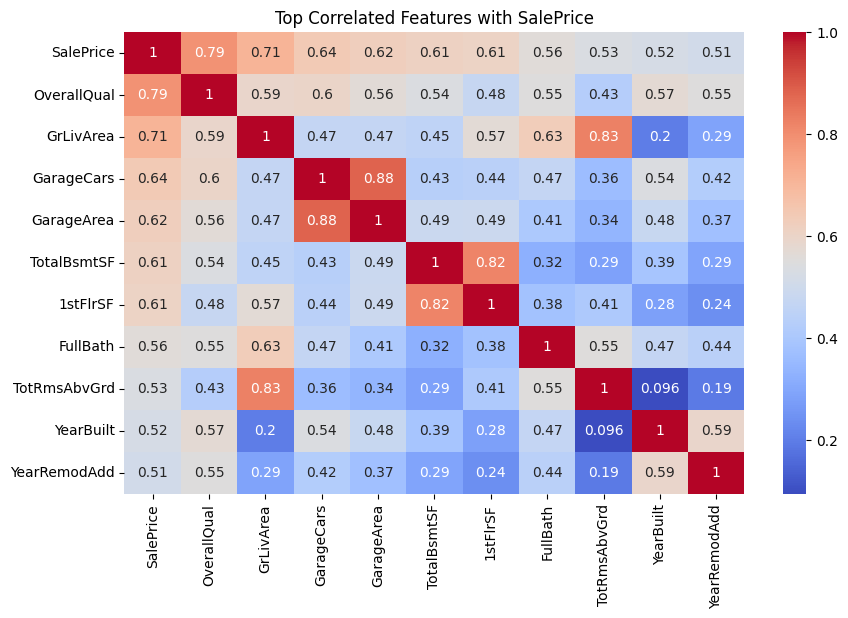

Top 10 correlated features with SalePrice:
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


In [ ]:
#Use a heatmap or correlation matrix to see which numerical features are highly correlated with SalePrice

# Select only numeric columns
numeric_features=train.select_dtypes(include=['int64', 'float64'])

# Compute correlation with SalePrice
correlation_matrix= numeric_features.corr()

# Plot top 10 features most correlated with SalePrice
top_corr=correlation_matrix['SalePrice'].sort_values(ascending=False).head(11)

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_features[top_corr.index].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Features with SalePrice')
plt.show()

top_feature_names = top_corr.index[1:].tolist()  # Skip 'SalePrice' itself
print("Top 10 correlated features with SalePrice:")
print(top_feature_names)



In [ ]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

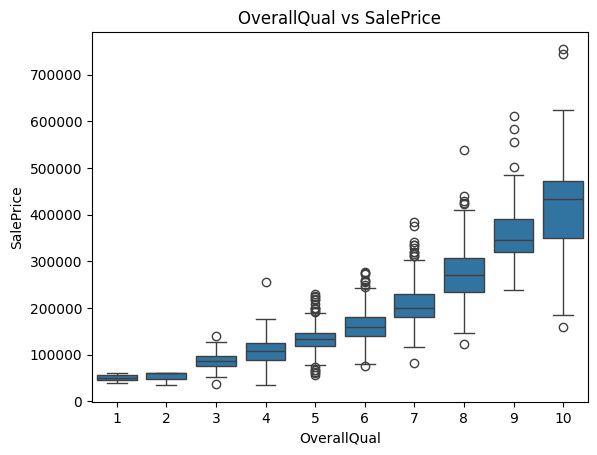

In [ ]:
# OverallQual
#This is a categorical ordinal feature, even though it's numeric (from 1 to 10)
#and we should not treat extreme values as outliers in the traditional sense (e.g., by using IQR or z-score).
sns.boxplot(x='OverallQual', y='SalePrice', data=train)
plt.title('OverallQual vs SalePrice')
plt.show()


The boxplot confirms a strong positive relationship between OverallQual and SalePrice, and also shows some visually clear outliers,for example:
OverallQual = 8 with prices below $200,000
OverallQual = 3 or 4 with prices above $300,000
These combinations are very rare and may distort the regression model later.

In [ ]:
# Dropping contradictory outliers in high-quality houses
train = train[~((train['OverallQual'] >=7) & (train['SalePrice'] < 150000))]
train=train[~((train['OverallQual']==4) & (train['SalePrice'] > 200000))]


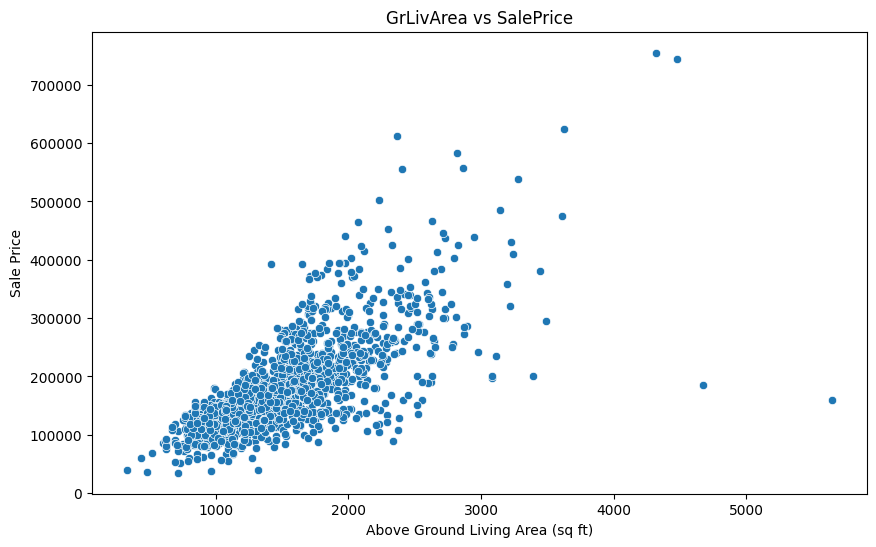

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()


In [ ]:
# Remove outliers: very large houses with low sale price
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)


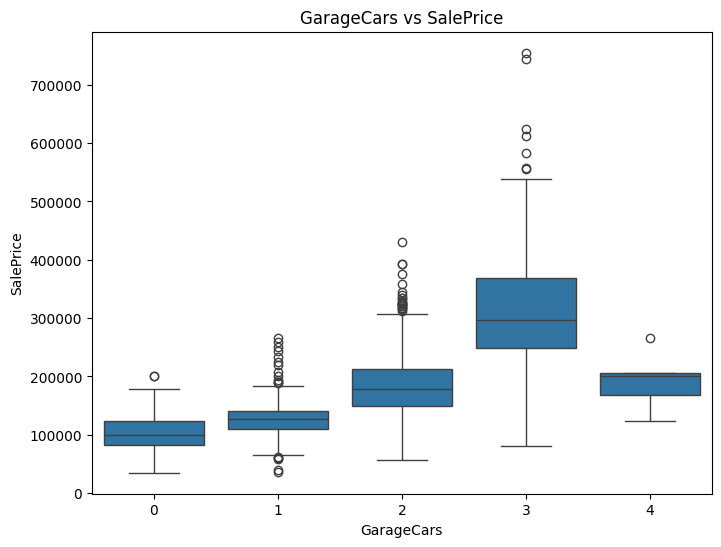

In [ ]:
# Boxplot of GarageCars vs SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=train)
plt.title('GarageCars vs SalePrice')
plt.show()


In [ ]:
print(train[train['GarageCars'] == 4].shape)

train[train['GarageCars'] == 4]['YearBuilt'].value_counts().sort_index()


(5, 77)


,count
YearBuilt,
1880,1
1961,1
1969,1
1971,1
1997,1


Since GarageCars is an ordinal and interpretable feature, and it's correlated with price overall, it's not needed to remove these 5 rows just because they're "off".
Since we are planning robust regression modeling:
**Leave them as-is**
Recommended for tree-based models like Random Forest and XGBoost.

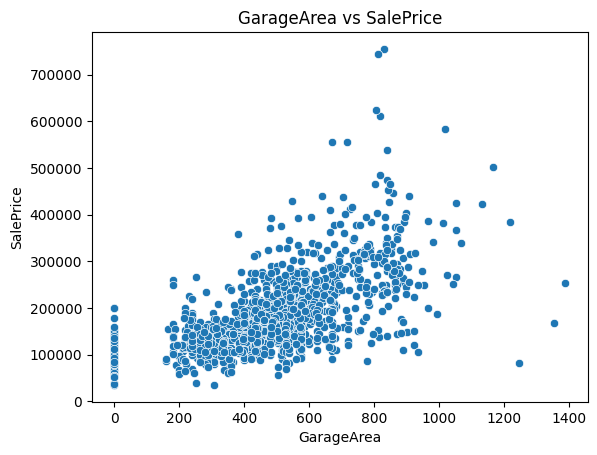

In [ ]:
sns.scatterplot(x='GarageArea', y='SalePrice', data=train)
plt.title('GarageArea vs SalePrice')
plt.show()


In [ ]:
#we can have a binary feature that clearly tells if a house has a garage (1) or not (0).
#this is might be helpful to use it as a feature in ML models
train['HasGarage'] = (train['GarageArea'] > 0).astype(int)


In [ ]:
#Quantify the outliers
Q1 = train['GarageArea'].quantile(0.25)
Q3 = train['GarageArea'].quantile(0.75)
IQR = Q3 - Q1

# Define upper threshold (optional: use 1.5 * IQR or 3 * IQR for extreme outliers)
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers= train[train['GarageArea'] > upper_bound]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 20


In [ ]:
outliers[['GarageArea', 'SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt']]



#train[train['GarageArea'] > upper_bound][['GarageArea', 'SalePrice']]
#Since they are only few, so it's better to remove them
#train = train[train['GarageArea'] <= upper_bound]



,GarageArea,SalePrice,GrLivArea,OverallQual,YearBuilt
178,1166,501837,2234,9,2008
224,968,386250,2392,10,2003
270,1053,266000,1939,8,2006
317,1025,270000,1959,8,2006
408,947,280000,2172,7,2006
581,1390,253293,2042,8,2008
664,1134,423000,2097,8,2005
718,983,341000,2418,7,1993
803,1020,582933,2822,9,2008
825,1220,385000,2084,10,2007


In [ ]:
# Define thresholds
price_threshold = train['SalePrice'].quantile(0.90)
area_threshold = train['GrLivArea'].quantile(0.85)

# Apply filters to mark "luxury"
train['IsLuxury'] = (
    (train['SalePrice'] >= price_threshold) &
    (train['OverallQual'] >= 8) &
    (train['GrLivArea'] >= area_threshold)
)


In [ ]:
# Check which outliers are luxury
garage_outliers = train[train['GarageArea'] > upper_bound]
garage_outliers[['GarageArea', 'SalePrice', 'OverallQual', 'GrLivArea', 'IsLuxury']]


,GarageArea,SalePrice,OverallQual,GrLivArea,IsLuxury
178,1166,501837,9,2234,True
224,968,386250,10,2392,True
270,1053,266000,8,1939,False
317,1025,270000,8,1959,False
408,947,280000,7,2172,False
581,1390,253293,8,2042,False
664,1134,423000,8,2097,True
718,983,341000,7,2418,False
803,1020,582933,9,2822,True
825,1220,385000,10,2084,True


In [ ]:
# Drop non-luxury garage outliers
non_luxury_garage_outliers = garage_outliers[garage_outliers['IsLuxury'] == False]
train = train.drop(non_luxury_garage_outliers.index)

In [ ]:
print(f"Removed {non_luxury_garage_outliers.shape[0]} non-luxury GarageArea outliers.")

Removed 12 non-luxury GarageArea outliers.


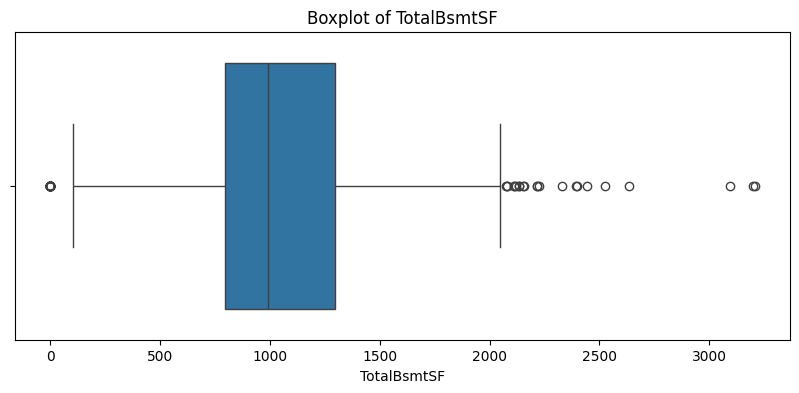

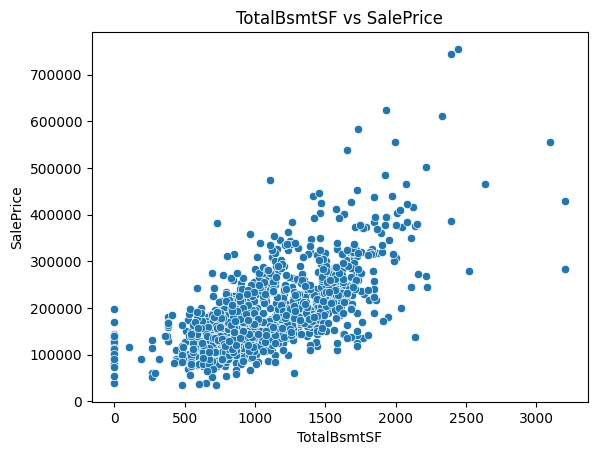

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=train['TotalBsmtSF'])
plt.title('Boxplot of TotalBsmtSF')
plt.show()

sns.scatterplot(data=train, x='TotalBsmtSF', y='SalePrice')
plt.title('TotalBsmtSF vs SalePrice')
plt.show()


In [ ]:
#Quantify the outliers
Q1= train['TotalBsmtSF'].quantile(0.25)
Q3= train['TotalBsmtSF'].quantile(0.75)
IQR=Q3 - Q1

# Define upper threshold (optional: use 1.5 * IQR or 3 * IQR for extreme outliers)
upper_bound =Q3 + 1.5 * IQR

# Identify outliers
outliers= train[train['TotalBsmtSF'] > upper_bound]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 22


In [ ]:
# Step 2: Create a new column 'IsBasementJustified'
train['IsBasementJustified'] = (
    (train['TotalBsmtSF'] > upper_bound) &
    (train['GrLivArea'] >= train['GrLivArea'].quantile(0.75)) &
    (train['OverallQual'] >= 7)
)

# Step 3: Get the outliers
bsmt_outliers=train[train['TotalBsmtSF'] > upper_bound]

# Step 4: Now this will work
bsmt_outliers[['TotalBsmtSF', 'GrLivArea', 'OverallQual', 'IsBasementJustified']]


,TotalBsmtSF,GrLivArea,OverallQual,IsBasementJustified
70,2223,2223,7,True
178,2216,2234,9,True
224,2392,2392,10,True
278,2121,2121,9,True
313,2136,2036,7,True
332,3206,1629,8,False
440,3094,2402,10,True
477,2153,2643,9,True
496,3200,3228,8,True
654,2109,2113,8,True


In [ ]:
# Step 5: Drop only the unjustified basement outliers
non_luxury_bsmt_outliers = bsmt_outliers[bsmt_outliers['IsBasementJustified'] == False]
train = train.drop(non_luxury_bsmt_outliers.index)

# Optional: Confirm how many were dropped
print(f"Dropped {non_luxury_bsmt_outliers.shape[0]} unjustified large basement outliers.")


Dropped 2 unjustified large basement outliers.


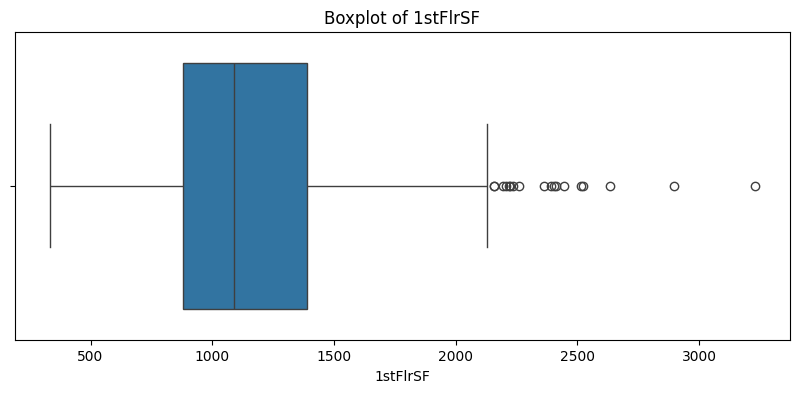

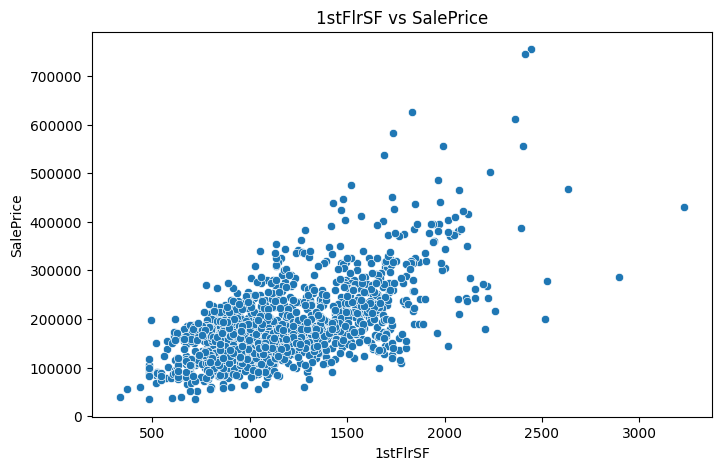

In [ ]:
# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=train['1stFlrSF'])
plt.title('Boxplot of 1stFlrSF')
plt.show()

# Scatterplot with SalePrice
plt.figure(figsize=(8, 5))
sns.scatterplot(x=train['1stFlrSF'], y=train['SalePrice'])
plt.title('1stFlrSF vs SalePrice')
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.show()


In [ ]:
Q1 = train['1stFlrSF'].quantile(0.25)
Q3 = train['1stFlrSF'].quantile(0.75)
IQR = Q3 - Q1
upper_bound= Q3 + 1.5 * IQR

In [ ]:
# Add a luxury justification column
train['Is1stFlrJustified'] = (
    (train['1stFlrSF'] > upper_bound) &
    (train['OverallQual'] >=7) &
    (train['GrLivArea'] >= train['GrLivArea'].quantile(0.75)) &
    (train['SalePrice'] >= train['SalePrice'].quantile(0.75))
)

In [ ]:
firstflr_outliers = train[train['1stFlrSF'] > upper_bound]
firstflr_outliers[['1stFlrSF', 'OverallQual', 'GrLivArea', 'SalePrice', 'Is1stFlrJustified']]

,1stFlrSF,OverallQual,GrLivArea,SalePrice,Is1stFlrJustified
66,2207,7,2207,180000,False
70,2223,7,2223,244000,True
113,2259,6,2259,217000,False
175,2158,6,2158,243000,False
178,2234,9,2234,501837,True
224,2392,10,2392,386250,True
440,2402,10,2402,555000,True
496,3228,8,3228,430000,True
529,2515,6,2515,200624,False
691,2444,10,4316,755000,True


In [ ]:
to_drop = firstflr_outliers[firstflr_outliers['Is1stFlrJustified'] == False]
train = train.drop(to_drop.index)

print(f"Dropped {to_drop.shape[0]} unjustified 1stFlrSF outliers.")

Dropped 4 unjustified 1stFlrSF outliers.


FullBath
0      9
1    633
2    741
3     31
Name: count, dtype: int64


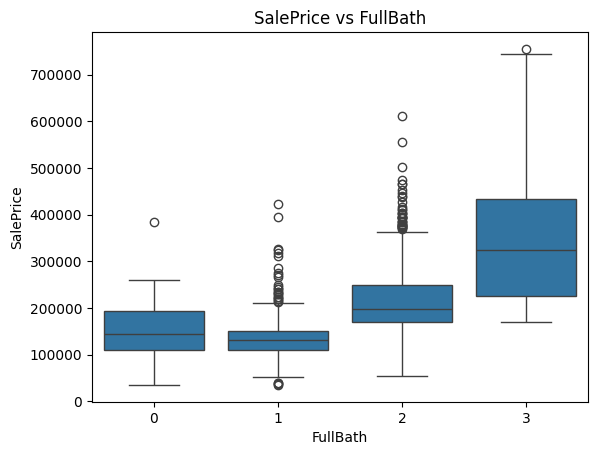

In [ ]:
print(train['FullBath'].value_counts().sort_index())

sns.boxplot(x='FullBath', y='SalePrice', data=train)
plt.title('SalePrice vs FullBath')
plt.show()


TotRmsAbvGrd
2       1
3      17
4      93
5     271
6     393
7     314
8     182
9      69
10     47
11     17
12      9
14      1
Name: count, dtype: int64


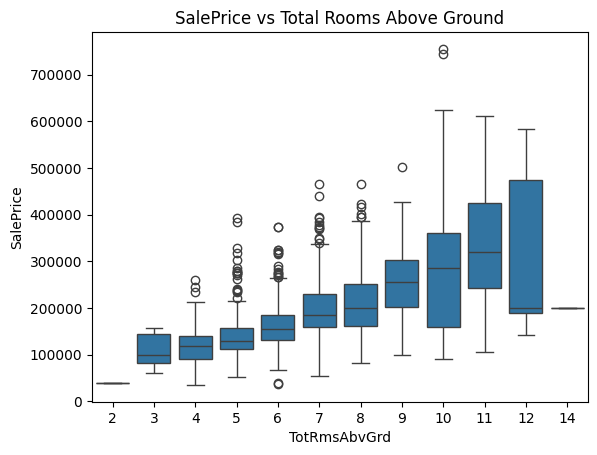

In [ ]:
print(train['TotRmsAbvGrd'].value_counts().sort_index())
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=train)
plt.title('SalePrice vs Total Rooms Above Ground')
plt.show()


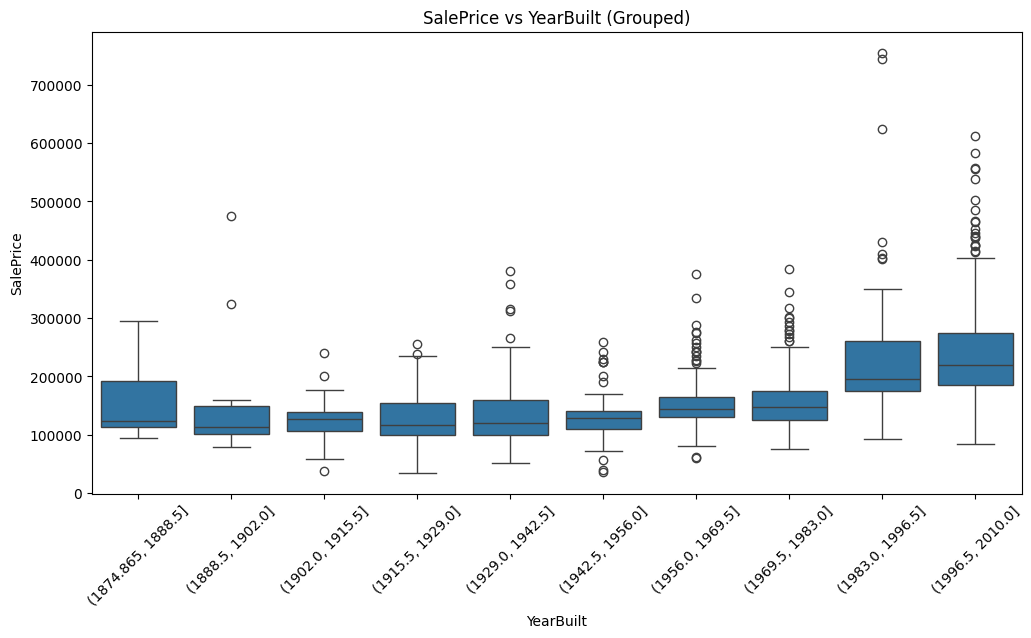

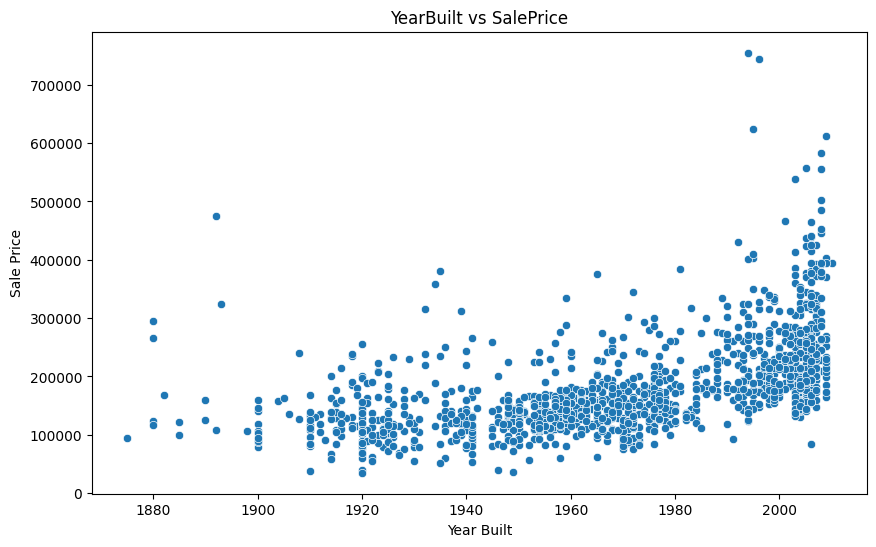

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(train['YearBuilt'], bins=10), y=train['SalePrice'])
plt.xticks(rotation=45)
plt.title('SalePrice vs YearBuilt (Grouped)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=train['YearBuilt'], y=train['SalePrice'])
plt.title('YearBuilt vs SalePrice')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()


In [ ]:
#Implementing Categorical encoding
# First, we should concatenate the train and test data before we do the encoding
train['is_train']=1
test['is_train']=0
full_data=pd.concat([train, test], sort=False)

#selcting the categorical variables from the full_data
cat_col=full_data.select_dtypes(include='object').columns


In [ ]:
print(cat_col)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'IsLuxury',
       'IsBasementJustified'],
      dtype='object')


In [ ]:
# A.One-Hot Encoding (Nominal Features)
one_hot_cols = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
    'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition'
]

In [ ]:
#Ordinal Encoding (Ordered Categories)
ordinal_encoding_map = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1
}

ordinal_cols = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'HeatingQC', 'BsmtExposure','KitchenQual', 'FireplaceQu',
    'GarageQual', 'GarageCond'
]


In [ ]:
bsmt_fin_type1_map = {
    'GLQ': 6,
    'ALQ': 5,
    'BLQ': 4,
    'Rec': 3,
    'LwQ': 2,
    'Unf': 1,
    'NA': 0
}
full_data['BsmtFinType1'] = full_data['BsmtFinType1'].map(bsmt_fin_type1_map)
full_data['BsmtFinType2'] = full_data['BsmtFinType2'].map(bsmt_fin_type1_map)

In [ ]:
full_data['BsmtFinType1'].head()

,BsmtFinType1
0,6
1,5
2,6
4,6
5,6
